In [ ]:
import numpy as np

def simulate_hat_problem(n, trials=10000):
    success_count = 0  # 统计至少有一个人正确的次数
    total_correct = 0  # 统计所有实验中拿对帽子的人数总和

    for _ in range(trials):
        hats = np.arange(n)  # 0, 1, ..., n-1 对应每个人的帽子
        np.random.shuffle(hats)  # 随机打乱
        correct = np.sum(hats == np.arange(n))  # 统计正确匹配的个数

        if correct > 0:
            success_count += 1
        
        total_correct += correct

    prob_at_least_one = success_count / trials
    expected_correct = total_correct / trials

    return prob_at_least_one, expected_correct

# 运行模拟
n = 10  # 例如有10个人
probability, expectation = simulate_hat_problem(n)
print(f"至少一个人拿对帽子的概率: {probability:.4f}")
print(f"期望拿对帽子的人数: {expectation:.4f}")


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [20]:
data = datasets.fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

In [22]:
type(pixel_values)

pandas.core.frame.DataFrame

In [26]:
type(targets)

pandas.core.series.Series

In [23]:
pixel_values = pixel_values.to_numpy()

In [27]:
targets = targets.to_numpy()

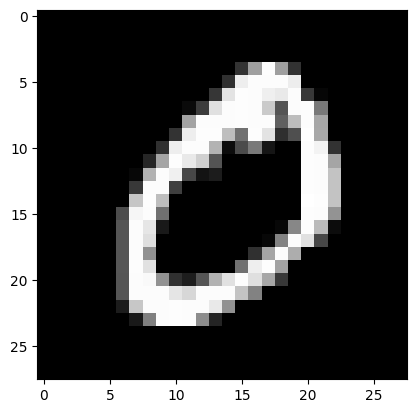

In [25]:
single_image = pixel_values[1, :].reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [28]:
tsne = manifold.TSNE(n_components=2, random_state=42)
tsne

TSNE(random_state=42)

In [29]:
transformed_data = tsne.fit_transform(pixel_values[:3000, :])
transformed_data

array([[ 20.645609 , -12.76141  ],
       [ 57.9068   ,   1.4365795],
       [ -1.7769039, -54.358166 ],
       ...,
       [-31.4633   , -12.437337 ],
       [-26.461899 ,  47.629547 ],
       [ 11.582179 , -24.829185 ]], dtype=float32)

In [30]:
transformed_data.shape

(3000, 2)

In [31]:
targets[:3000]

array([5, 0, 4, ..., 9, 1, 5])

In [32]:
len(targets[:3000])

3000

In [33]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[:3000])),  columns=["x", "y", "targets"] ) 
tsne_df

,x,y,targets
0,20.645609,-12.761410,5.0
1,57.906799,1.436579,0.0
2,-1.776904,-54.358166,4.0
3,-41.709946,13.048183,1.0
4,-11.072882,-32.547997,9.0
...,...,...,...
2995,-37.179459,-24.002104,7.0
2996,53.037403,-2.126689,0.0
2997,-31.463301,-12.437337,9.0
2998,-26.461899,47.629547,1.0


In [36]:
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int) 
tsne_df

,x,y,targets
0,20.645609,-12.761410,5.0
1,57.906799,1.436579,0.0
2,-1.776904,-54.358166,4.0
3,-41.709946,13.048183,1.0
4,-11.072882,-32.547997,9.0
...,...,...,...
2995,-37.179459,-24.002104,7.0
2996,53.037403,-2.126689,0.0
2997,-31.463301,-12.437337,9.0
2998,-26.461899,47.629547,1.0


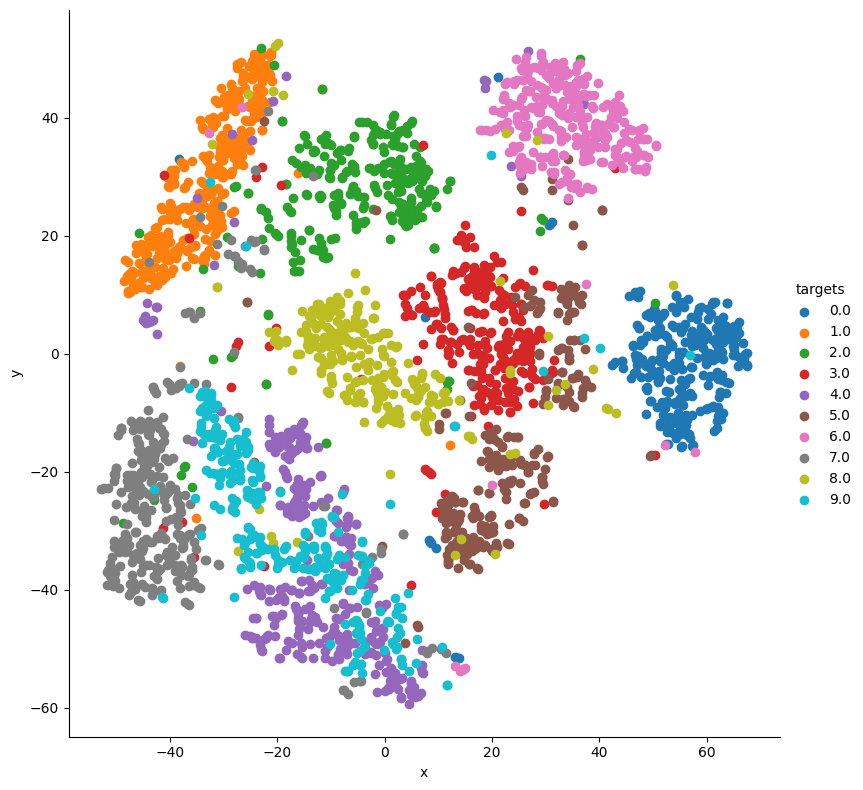

In [39]:
# grid = sns.FacetGrid(tsne_df, hue="targets", size=8) 
grid = sns.FacetGrid(tsne_df, hue="targets", height=8) 
grid.map(plt.scatter, "x", "y").add_legend() 

Cross-validation     
We did not build any models in the previous chapter.     
The reason for that is simple.     
Before creating any kind of machine learning model, 
we must know that cross-validation is and how to choose     
the best cross-validation depending on your datasets.

So, what is cross-validation, and why should we care about it?    
We can find multiple definitions as to what cross-validation is.    
Mine is a one-liner:      
cross-validation is a step in the process of building a machine learning model     
which helps us ensure that our models fit the data accurately and also ensures    
that we do not overfit. But this leads to another term: overfitting.

To explain overfitting, I think it's best if we look at a dataset.     
There is a red wine-quality dataset which is quite famous.    


In [41]:
import pandas as pd

df = pd.read_csv("winequality-red.csv",header=0,sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [42]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [43]:
# a mapping dictionary taht maps the quality values from 0 to 5

quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

# you can use the map function of pandas with
# any dictionary to convert the values in a given
# column to values in the dictionary
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [44]:
df.quality.unique()

array([2, 3, 4, 1, 5, 0])

In [45]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe

df = df.sample(frac=1).reset_index(drop=True)

# top 1000 rows are selected
# for training
df_train = df.head(1000)

# bottom 599 values are selected
# for testing/validation
df_test = df.tail(599)

In [46]:
# import from scikit-learn
from sklearn import tree
from sklearn import metrics

# initialize decision tree classifier class
# with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)

# choose the columns you want to train on
# these are the features for the model
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol']
# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [47]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# calculate the accuracy of predictions on
# training data set
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)

# calculate the accuracy of predictions on
# test data set
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

In [48]:
print(train_accuracy, test_accuracy)

0.588 0.5559265442404007


In [49]:
# initialize decision tree classifier class
# with a max_depth of 3
clf2 = tree.DecisionTreeClassifier(max_depth=7)

# choose the columns you want to train on
# these are the features for the model
cols2 = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol']
# train the model on the provided features
# and mapped quality from before
clf2.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=7)

In [50]:
# generate predictions on the training set
train_predictions2 = clf2.predict(df_train[cols])

# generate predictions on the test set
test_predictions2 = clf2.predict(df_test[cols])

# calculate the accuracy of predictions on
# training data set
train_accuracy2 = metrics.accuracy_score(df_train.quality, train_predictions2)

# calculate the accuracy of predictions on
# test data set
test_accuracy2 = metrics.accuracy_score(df_test.quality, test_predictions2)

In [51]:
print(train_accuracy2, test_accuracy2)

0.761 0.5826377295492488


In [53]:
# import matplotlib and seaborn
# for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# this is our global size of label text
# on the plots

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

# this line ensures that the plot is displayed
# inside the notebook
%matplotlib inline

In [54]:
# initialize lists to store accuracies
# for training and test data
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterate over a few depth values
for depth in range(1, 25):
    # init the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)

    # columns/features for training
    # note that, this can be outside the loop
    cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']
    # fit the model on given features
    clf.fit(df_train[cols], df_train.quality)

    # create training & test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])

    # calculate training & test accuracies
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

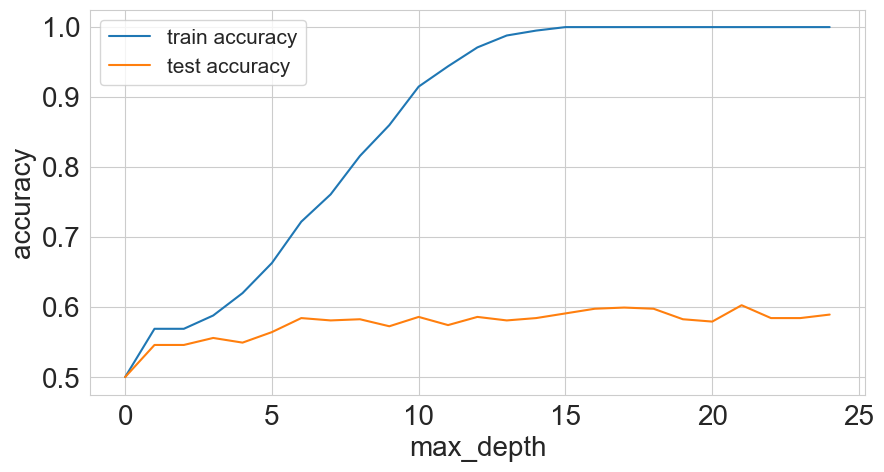

In [55]:
# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()